In [ ]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving SMU DSA Society x Maersk Case Competition 2023 Datasets.zip to SMU DSA Society x Maersk Case Competition 2023 Datasets.zip
User uploaded file "SMU DSA Society x Maersk Case Competition 2023 Datasets.zip" with length 3066085 bytes


In [ ]:
!unzip /content/"SMU DSA Society x Maersk Case Competition 2023 Datasets.zip" -d dataset

Archive:  /content/SMU DSA Society x Maersk Case Competition 2023 Datasets.zip
  inflating: dataset/Airline Passenger Satisfaction.csv  
  inflating: dataset/Voice of Customer.csv  


In [ ]:
import pandas as pd
import numpy as np

csv_file_path = '/content/dataset/Voice of Customer.csv'
df_voice = pd.read_csv(csv_file_path)
df_voice = df_voice.drop(['id', 'satisfaction', 'satisfaction score'], axis=1) #drop unnecessary columns
df_voice = df_voice[~df_voice['voice of customer'].str.contains('NIL')]

df_voice.head()

,voice of customer
6,The emotional toll of the experience was overw...
10,The extended wait for flight arrival was highl...
13,The airline did not provide any updates during...
17,The airline did not provide any compensation f...
28,The airline charged excessive fees for baggage.


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
from collections import Counter

# Step 1: Lowercase and tokenize the text
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

df_voice['voice of customer'] = df_voice['voice of customer'].str.lower()
df_voice['tokens'] = df_voice['voice of customer'].apply(word_tokenize)

# Step 2: Remove stopwords and punctuation
stop_words = set(stopwords.words('english'))
punctuations = set(string.punctuation)

df_voice['filtered_tokens'] = df_voice['tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words and word not in punctuations])

# Step 3: Lemmatize the words
lemmatizer = WordNetLemmatizer()
df_voice['filtered_tokens'] = df_voice['filtered_tokens'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])

# Step 4: Generate bigrams (you can also try trigrams or higher n-grams)
ngrams_list = df_voice['filtered_tokens'].apply(lambda tokens: list(nltk.ngrams(tokens, 5)))  # Change '2' to '3' for trigrams

# Step 5: Flatten the list of bigrams into a single list
all_phrases = [phrase for ngrams in ngrams_list for phrase in ngrams]

# Step 6: Count the frequency of phrases
phrase_freq = Counter(all_phrases)

# Step 7: Find the most common phrases
most_common_phrases = phrase_freq.most_common(10)
print("Most common phrases in negative feedback:")
print(most_common_phrases)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Most common phrases in negative feedback:
[(('faced', 'challenge', 'understanding', 'airline', "'s"), 14), (('challenge', 'understanding', 'airline', "'s", 'complex'), 14), (('encountered', 'difficulty', 'understanding', 'airline', "'s"), 14), (('boarding', 'process', 'delayed', 'due', 'airline'), 11), (('process', 'delayed', 'due', 'airline', "'s"), 11), (('delayed', 'due', 'airline', "'s", 'inefficient'), 11), (('due', 'airline', "'s", 'inefficient', 'slow'), 11), (('difficulty', 'understanding', 'airline', "'s", 'complex'), 11), (('cabin', 'lacked', 'proper', 'disposal', 'used'), 9), (('delay', 'flight', 'arrival', 'left', 'feeling'), 6)]


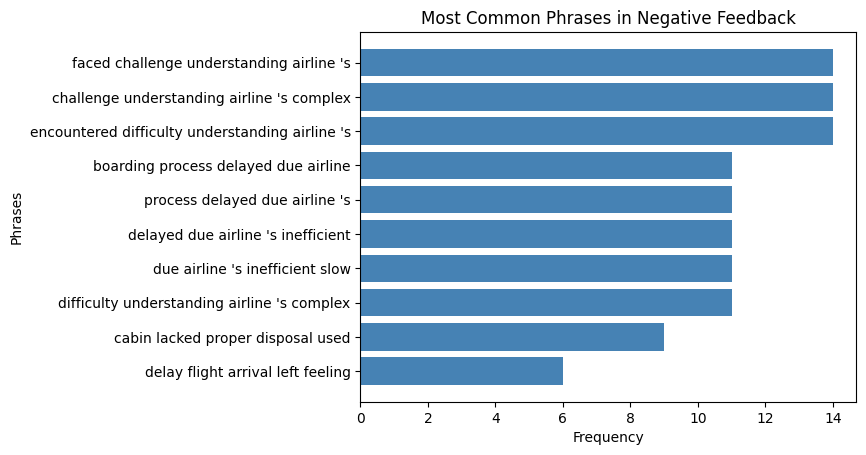

In [ ]:
import matplotlib.pyplot as plt

data = [(('faced', 'challenge', 'understanding', 'airline', "'s"), 14),
        (('challenge', 'understanding', 'airline', "'s", 'complex'), 14),
        (('encountered', 'difficulty', 'understanding', 'airline', "'s"), 14),
        (('boarding', 'process', 'delayed', 'due', 'airline'), 11),
        (('process', 'delayed', 'due', 'airline', "'s"), 11),
        (('delayed', 'due', 'airline', "'s", 'inefficient'), 11),
        (('due', 'airline', "'s", 'inefficient', 'slow'), 11),
        (('difficulty', 'understanding', 'airline', "'s", 'complex'), 11),
        (('cabin', 'lacked', 'proper', 'disposal', 'used'), 9),
        (('delay', 'flight', 'arrival', 'left', 'feeling'), 6)]


phrases, counts = zip(*data)

phrases = [" ".join(phrase) for phrase in phrases]

plt.barh(phrases, counts, color='steelblue')
plt.xlabel('Frequency')
plt.ylabel('Phrases')
plt.title('Most Common Phrases in Negative Feedback')
plt.gca().invert_yaxis()  # invert the y-axis to have the highest count at the top
plt.show()

